In [ ]:
# Import necessary libraries
import flexynesis
import pandas as pd
import numpy as np
import os

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x71cf277683d0>>
Traceback (most recent call last):
  File "/home/codespace/miniconda3/envs/flexenv/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 
Seed set to 42


In [ ]:
# Check if the dataset is already downloaded, if not, download and extract it
if not os.path.exists("brca_metabric_processed"):
    !wget -O brca_metabric.tgz "https://bimsbstatic.mdc-berlin.de/akalin/buyar/flexynesis-benchmark-datasets/brca_metabric_processed.tgz" && tar -xzvf brca_metabric.tgz

In [ ]:
# Import the data and prepare the training and testing datasets
data_importer = flexynesis.DataImporter(path ='brca_metabric_processed', 
                                        data_types = ['cna', 'gex'], 
                                        concatenate=False, 
                                        top_percentile=10, 
                                        min_features=100, 
                                        variance_threshold=0.8,  
                                       )
train_dataset, test_dataset = data_importer.import_data()


[INFO] ================= Importing Data =================
[INFO] Validating data folders...

[INFO] ----------------- Reading Data ----------------- 
[INFO] Importing brca_metabric_processed/train/gex.csv...
[INFO] Importing brca_metabric_processed/train/cna.csv...
[INFO] Importing brca_metabric_processed/train/clin.csv...

[INFO] ----------------- Reading Data ----------------- 
[INFO] Importing brca_metabric_processed/test/gex.csv...
[INFO] Importing brca_metabric_processed/test/cna.csv...
[INFO] Importing brca_metabric_processed/test/clin.csv...

[INFO] ----------------- Checking for problems with the input data ----------------- 
[INFO] Data structure is valid with no errors or warnings.

[INFO] ----------------- Processing Data (train) ----------------- 

[INFO] ----------------- Cleaning Up Data ----------------- 

[INFO] working on layer:  cna
[INFO] Imputing NA values to median of features, affected # of cells in the matrix 108  # of rows: 87
[INFO] Number of NA values:  0
[IN

Filtering redundant features: 100%|██████████| 450/450 [00:00<00:00, 269980.95it/s]


[INFO] Implementing feature selection using laplacian score for layer: gex with  4121 features  and  1303  samples 


Filtering redundant features: 100%|██████████| 412/412 [00:00<00:00, 3207.42it/s]



[INFO] ----------------- Processing Data (test) ----------------- 

[INFO] ----------------- Cleaning Up Data ----------------- 

[INFO] working on layer:  cna
[INFO] Imputing NA values to median of features, affected # of cells in the matrix 63  # of rows: 51
[INFO] Number of NA values:  0
[INFO] DataFrame cna - Removed 18033 features.

[INFO] working on layer:  gex
[INFO] Number of NA values:  0
[INFO] DataFrame gex - Removed 16482 features.
[INFO] DataFrame cna - Removed 2 samples (0.36%).
[INFO] DataFrame gex - Removed 2 samples (0.36%).

[INFO] ----------------- Harmonizing Data Sets ----------------- 

[INFO] ----------------- Finished Harmonizing ----------------- 

[INFO] ----------------- Normalizing Data ----------------- 

[INFO] ----------------- Normalizing Data ----------------- 
[INFO] Training Data Stats:  {'feature_count in: gex': 408, 'feature_count in: cna': 450, 'sample_count': 1303}
[INFO] Test Data Stats:  {'feature_count in: gex': 408, 'feature_count in: cna': 4

In [ ]:
train_dataset.dat # data matrices

{'gex': tensor([[-3.1517e+00, -2.5559e+00, -1.8301e+00,  ...,  5.8036e-01,
           4.7205e-01,  4.2038e-01],
         [ 1.5072e-03, -1.6176e+00,  2.5825e-01,  ...,  1.7418e+00,
           2.5635e+00,  2.5042e+00],
         [ 1.0257e-01,  5.4927e-02, -1.8368e-01,  ..., -8.9080e-01,
          -9.7378e-01, -1.2790e+00],
         ...,
         [ 6.6596e-01,  6.5587e-01,  8.9184e-01,  ...,  2.5353e-01,
           5.2100e-01,  3.1515e-01],
         [ 6.6799e-01,  7.0370e-01,  8.7512e-01,  ..., -3.3613e-02,
          -1.1338e-01, -3.7721e-02],
         [ 3.6473e-01,  6.8590e-01, -1.5868e+00,  ..., -1.3728e-01,
           3.0307e-01,  2.0910e-01]]),
 'cna': tensor([[ 0.2908,  0.2509,  0.2583,  ...,  0.2730,  0.2473,  0.2537],
         [ 0.2908,  0.2509,  0.2583,  ...,  0.2730,  0.2473,  0.2537],
         [ 0.2908,  0.2509,  0.2583,  ...,  0.2730,  0.2473,  0.2537],
         ...,
         [ 0.2908,  0.2509,  0.2583,  ...,  0.2730,  0.2473,  0.2537],
         [ 0.2908,  0.2509,  0.2583,  ...,

In [ ]:
train_dataset.dat['gex'].shape, train_dataset.dat['cna'].shape # shapes of the data matrices

(torch.Size([1303, 408]), torch.Size([1303, 450]))

In [ ]:
train_dataset.ann # clin sample annotation data 

{'LYMPH_NODES_EXAMINED_POSITIVE': tensor([ 0,  0, 15,  ...,  1,  1,  0]),
 'NPI': tensor([4.0780, 4.0720, 6.0500,  ..., 4.0500, 5.0420, 3.0400],
        dtype=torch.float64),
 'AGE_AT_DIAGNOSIS': tensor([59.2200, 66.9100, 34.6800,  ..., 53.5800, 63.0900, 57.9600],
        dtype=torch.float64),
 'OS_MONTHS': tensor([ 16.6000, 160.3000,   1.4333,  ...,  94.7000, 157.5333,  59.7000],
        dtype=torch.float64),
 'RFS_MONTHS': tensor([ 13.7500, 119.8400,   1.4100,  ...,  93.4500, 155.4600,  37.4300],
        dtype=torch.float64),
 'CELLULARITY': tensor([0., 2., 2.,  ..., 2., 0., 0.], dtype=torch.float64),
 'CHEMOTHERAPY': tensor([1., 0., 0.,  ..., 0., 0., 0.], dtype=torch.float64),
 'COHORT': tensor([0., 0., 0.,  ..., 2., 3., 1.], dtype=torch.float64),
 'ER_IHC': tensor([0., 1., 1.,  ..., 1., 1., 0.], dtype=torch.float64),
 'HER2_SNP6': tensor([2., 0., 1.,  ..., 2., 0., 0.], dtype=torch.float64),
 'HORMONE_THERAPY': tensor([0., 1., 1.,  ..., 1., 1., 0.], dtype=torch.float64),
 'INFERRED_

In [ ]:
train_dataset.label_mappings # label mappings of the sample labels for categorical variables

{'CELLULARITY': {0: 'High', 1: 'Low', 2: 'Moderate', 3: nan},
 'CHEMOTHERAPY': {0: 'NO', 1: 'YES'},
 'COHORT': {0: 'cohort1',
  1: 'cohort2',
  2: 'cohort3',
  3: 'cohort4',
  4: 'cohort5'},
 'ER_IHC': {0: 'Negative', 1: 'Positve', 2: nan},
 'HER2_SNP6': {0: 'GAIN', 1: 'LOSS', 2: 'NEUTRAL', 3: 'UNDEF'},
 'HORMONE_THERAPY': {0: 'NO', 1: 'YES'},
 'INFERRED_MENOPAUSAL_STATE': {0: 'Post', 1: 'Pre'},
 'SEX': {0: 'Female'},
 'INTCLUST': {0: '1',
  1: '10',
  2: '2',
  3: '3',
  4: '4ER+',
  5: '4ER-',
  6: '5',
  7: '6',
  8: '7',
  9: '8',
  10: '9'},
 'OS_STATUS': {0: '0:LIVING', 1: '1:DECEASED'},
 'CLAUDIN_SUBTYPE': {0: 'Basal',
  1: 'Her2',
  2: 'LumA',
  3: 'LumB',
  4: 'NC',
  5: 'Normal',
  6: 'claudin-low'},
 'THREEGENE': {0: 'ER+/HER2- High Prolif',
  1: 'ER+/HER2- Low Prolif',
  2: 'ER-/HER2-',
  3: 'HER2+',
  4: nan},
 'VITAL_STATUS': {0: 'Died of Disease',
  1: 'Died of Other Causes',
  2: 'Living',
  3: nan},
 'LATERALITY': {0: 'Left', 1: 'Right', 2: nan},
 'RADIO_THERAPY': {0: 

In [ ]:
train_dataset.samples[1:10], train_dataset.features # the row and column names

(['MB-0054',
  'MB-0374',
  'MB-4961',
  'MB-7007',
  'MB-5035',
  'MB-4846',
  'MB-2760',
  'MB-0528',
  'MB-0233'],
 {'gex': Index(['FOXA1', 'MLPH', 'ESR1', 'GATA3', 'SPDEF', 'TBC1D9', 'FOXC1', 'C1S',
         'XBP1', 'CA12',
         ...
         'N4BP2', 'TNFSF14', 'LEP', 'INIP', 'RPL7L1', 'MBD4', 'HCG2P7', 'ZNF430',
         'KIAA1791', 'IL10'],
        dtype='object', length=408),
  'cna': Index(['MSTO1', 'FCRLA', 'TOP1P1', 'LAMC1', 'TDRKH', 'DAP3', 'MSTO2P',
         'YY1AP1', 'SLC50A1', 'EFNA1',
         ...
         'XPR1', 'SOAT1', 'SELENBP1', 'PI4KB', 'SELP', 'RFX5', 'AXDND1',
         'KIAA1614', 'TRMT1L', 'FMO9P'],
        dtype='object', length=450)})

In [8]:
flexynesis.print_summary_stats(train_dataset)

Summary for variable: LYMPH_NODES_EXAMINED_POSITIVE
Numerical Variable Summary: Median = 0.0, Mean = 1.9286262471220261
------
Summary for variable: NPI
Numerical Variable Summary: Median = 4.04, Mean = 4.017291158864159
------
Summary for variable: AGE_AT_DIAGNOSIS
Numerical Variable Summary: Median = 61.79, Mean = 61.30643898695319
------
Summary for variable: OS_MONTHS
Numerical Variable Summary: Median = 114.4666667, Mean = 125.03573804066693
------
Summary for variable: RFS_MONTHS
Numerical Variable Summary: Median = 100.63, Mean = 109.94034535686878
------
Summary for variable: CELLULARITY
Categorical Variable Summary:
  Label: High, Count: 656
  Label: Low, Count: 136
  Label: Moderate, Count: 484
  Label: nan, Count: 27
------
Summary for variable: CHEMOTHERAPY
Categorical Variable Summary:
  Label: NO, Count: 1044
  Label: YES, Count: 259
------
Summary for variable: COHORT
Categorical Variable Summary:
  Label: cohort1, Count: 308
  Label: cohort2, Count: 196
  Label: cohort3

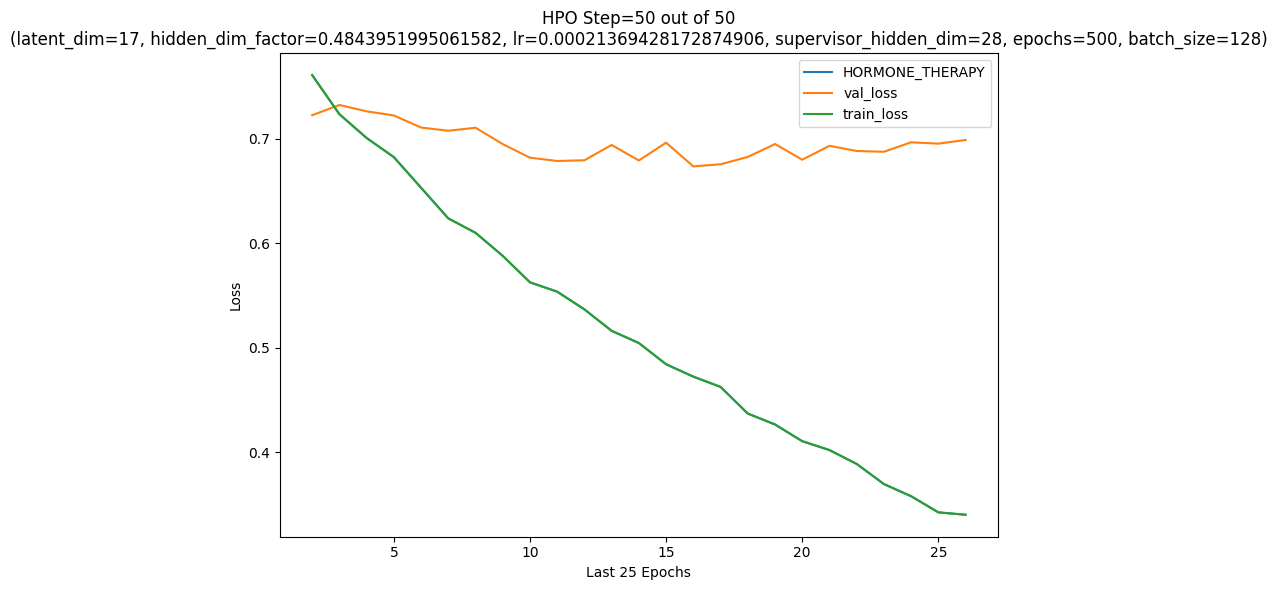

Validation: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      HORMONE_THERAPY      │    0.6989334225654602     │
│         val_loss          │    0.6989334225654602     │
└───────────────────────────┴───────────────────────────┘

Tuning Progress: 100%|██████████| 50/50 [15:44<00:00, 18.89s/it, Iteration=50, Best Loss=0.577]

[INFO] current best val loss: 0.5767203569412231; best params: {'latent_dim': np.int64(43), 'hidden_dim_factor': 0.5, 'lr': 0.0001, 'supervisor_hidden_dim': np.int64(25), 'epochs': np.int64(500), 'batch_size': np.int64(64)} since 19 hpo iterations


In [ ]:
# lets tune it!
tuner = flexynesis.HyperparameterTuning(dataset = train_dataset, 
                                        model_class = flexynesis.DirectPred, 
                                        target_variables = ["HORMONE_THERAPY"],
                                        config_name = "DirectPred", 
                                        n_iter=50,  plot_losses=True, early_stop_patience=10) 
model, best_params = tuner.perform_tuning()

In [28]:
model

DirectPred(
  (log_vars): ParameterDict(  (HORMONE_THERAPY): Parameter containing: [torch.FloatTensor of size 1])
  (encoders): ModuleList(
    (0): MLP(
      (layer_1): Linear(in_features=408, out_features=204, bias=True)
      (layer_out): Linear(in_features=204, out_features=43, bias=True)
      (relu): ReLU()
      (dropout): Dropout(p=0.1, inplace=False)
      (batchnorm): BatchNorm1d(204, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): MLP(
      (layer_1): Linear(in_features=450, out_features=225, bias=True)
      (layer_out): Linear(in_features=225, out_features=43, bias=True)
      (relu): ReLU()
      (dropout): Dropout(p=0.1, inplace=False)
      (batchnorm): BatchNorm1d(225, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (MLPs): ModuleDict(
    (HORMONE_THERAPY): MLP(
      (layer_1): Linear(in_features=86, out_features=25, bias=True)
      (layer_out): Linear(in_features=25, out_features=2, bias=True)
      (relu

In [29]:
best_params

{'latent_dim': np.int64(43),
 'hidden_dim_factor': 0.5,
 'lr': 0.0001,
 'supervisor_hidden_dim': np.int64(25),
 'epochs': 17,
 'batch_size': np.int64(64)}

In [ ]:
y_pred_dict = model.predict(test_dataset) # predictions made by the best model
y_pred_dict

{'HORMONE_THERAPY': array([[0.36240023, 0.63759977],
        [0.55282694, 0.4471731 ],
        [0.28445512, 0.7155449 ],
        ...,
        [0.12219514, 0.8778049 ],
        [0.17549089, 0.8245091 ],
        [0.20198953, 0.79801047]], dtype=float32)}

In [31]:
metrics_df = flexynesis.evaluate_wrapper(method = 'DirectPred', y_pred_dict=y_pred_dict, dataset = test_dataset)
metrics_df

,method,var,variable_type,metric,value
0,DirectPred,HORMONE_THERAPY,categorical,balanced_acc,0.696813
1,DirectPred,HORMONE_THERAPY,categorical,f1_score,0.718879
2,DirectPred,HORMONE_THERAPY,categorical,kappa,0.401644
3,DirectPred,HORMONE_THERAPY,categorical,average_auroc,0.739142
4,DirectPred,HORMONE_THERAPY,categorical,average_aupr,0.791921


In [ ]:
# Extract sample embeddings
ds = test_dataset
E = model.transform(ds)
E.head()

,E0,E1,E2,E3,E4,E5,E6,E7,E8,E9,...,E76,E77,E78,E79,E80,E81,E82,E83,E84,E85
MB-5324,-0.058277,0.224068,0.270981,0.196915,0.063777,-0.324803,-0.077248,-0.232215,0.251518,0.329888,...,0.130726,0.012264,-0.191779,-0.132553,-0.005816,0.065094,0.088370,0.027948,0.072473,-0.039519
MB-0522,-0.164876,-0.188048,-0.526655,-0.499098,-0.012743,-0.309366,-0.895384,-0.305874,1.046320,-0.391612,...,0.668682,-0.074645,-1.013603,0.117395,-0.248003,0.098495,0.709001,0.306310,0.130821,-0.063511
MB-3379,0.303984,0.116966,-0.101566,0.045927,0.033159,-0.330263,0.108324,-0.129993,0.331371,0.172834,...,0.559246,0.183230,-0.810190,-0.507242,0.111611,0.437408,0.265921,0.410537,0.180503,-0.320121
MB-4374,-0.893753,0.534200,0.693302,-0.477415,0.134843,-1.221688,0.083596,-0.387459,0.387018,0.053201,...,-0.086958,0.075331,-0.148377,0.445706,0.383676,0.111631,-0.466374,-0.397508,-0.486515,-0.261056
MB-4696,0.223604,-1.001214,-0.118615,-0.238216,-0.175095,-0.512887,-0.728415,-0.363904,1.859507,0.041009,...,0.326997,0.250024,0.250784,0.083106,0.539070,0.084665,-0.496979,-0.135746,-0.026045,-0.292734


In [ ]:
# Visualize the embeddings
f = 'HORMONE_THERAPY'
# Handle missing values with a default "Unknown" label
labels = []
for x in ds.ann[f].numpy():
    try:
        labels.append(ds.label_mappings[f][x])
    except KeyError:
        labels.append('Unknown')

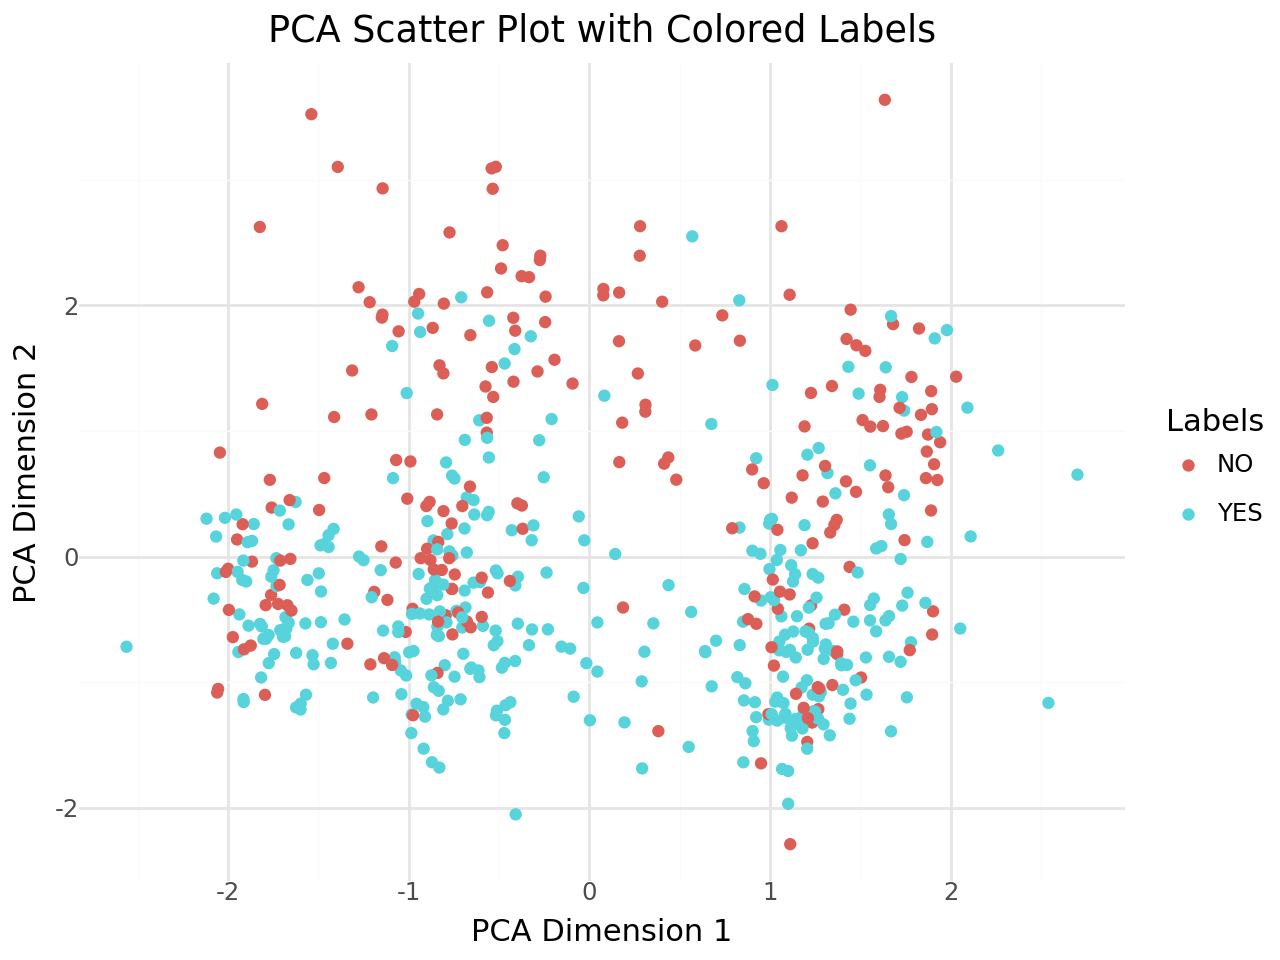

In [34]:
flexynesis.plot_dim_reduced(E, labels, color_type = 'categorical', method='pca')

/home/codespace/miniconda3/envs/flexenv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.


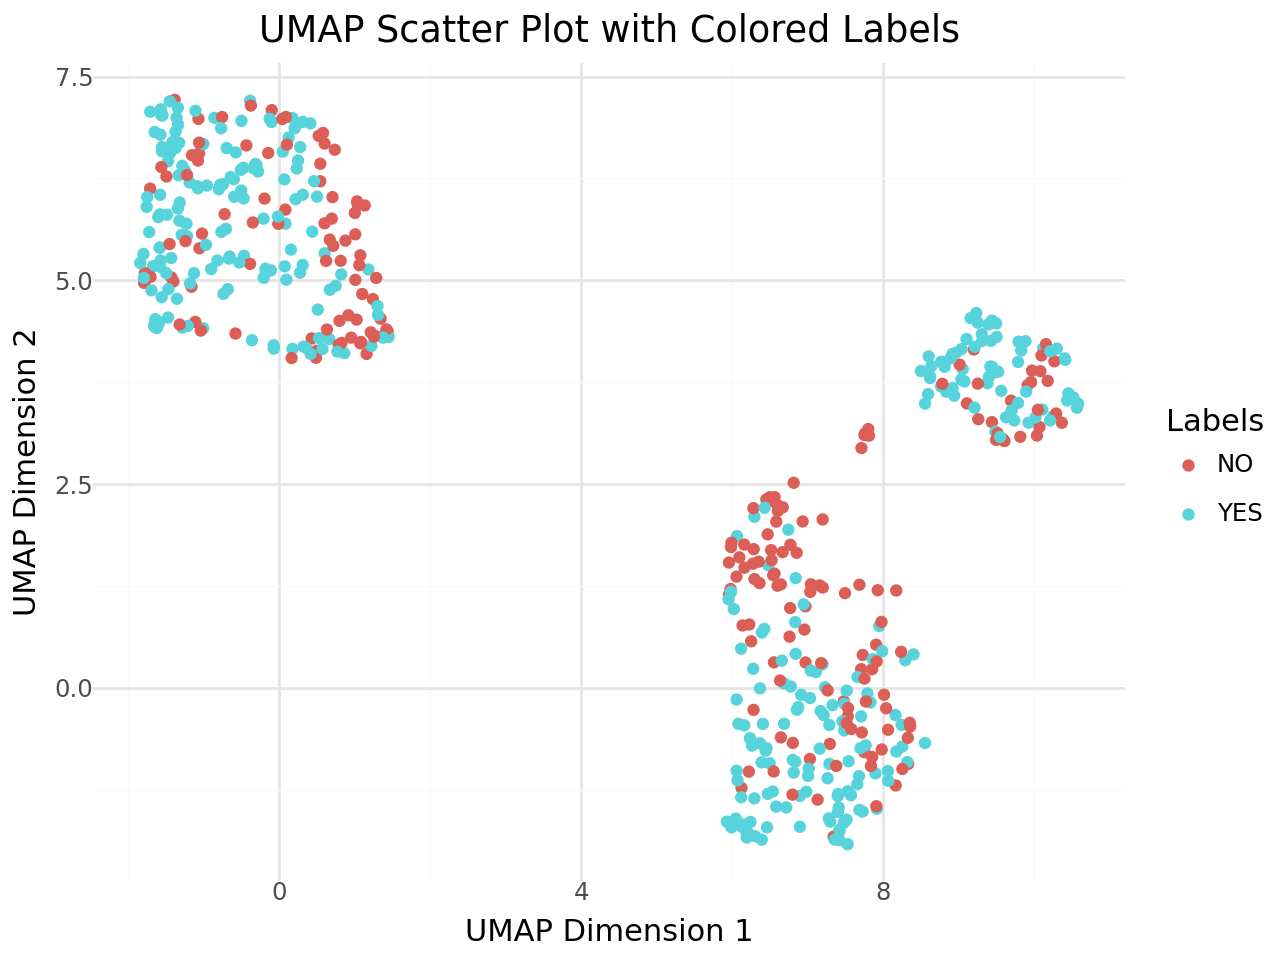

In [35]:
flexynesis.plot_dim_reduced(E, labels, color_type = 'categorical', method='umap')

These plots visualize the latent space embeddings learned by the model for the *test set*, with points colored by their true `HORMONE_THERAPY` status.

*   **PCA Plot:** Shows poor separation between the two classes. This indicates that the main *linear* variations captured by the model's learned features do not strongly distinguish between hormone therapy statuses.
*   **UMAP Plot:** Reveals much clearer structure with several distinct clusters. Within these clusters, there is noticeable, though incomplete, separation based on color (hormone therapy status).
*   **Interpretation:** The model has successfully learned a complex, *non-linear* representation of the multi-omic data where samples group together based on underlying patterns. This representation contains information relevant to hormone therapy status, allowing for partial separation (better visualized by UMAP). The imperfect separation aligns with the moderate evaluation metrics and reflects the inherent biological complexity of predicting this endpoint from the given omics data.